# Concentration de CO2 dans l'atmosphère depuis 1958

Ce document propose un analyse de la mesure de concentration en CO2 réalisée l'atmosphère à l'observatoire de Mauna Loca à Hawaii depuis 1958.
Pour plusieurs d'informations historique voir [le site Wikipédia](https://en.wikipedia.org/wiki/Keeling_Curve).
Les enregistrements ont été initié par C. David Keeling.

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.dates as md
sns.set(context='talk', style='whitegrid')

In [81]:
# lecture du document
nom_document = 'weekly_in_situ_co2_mlo.csv'
lien_vers_document = os.path.join(os.getcwd(), nom_document)
records = pd.read_csv(lien_vers_document,sep=',', lineterminator='\n', skiprows=43, header=0, names=['CO2 concentration'], infer_datetime_format=True)

# index du dataframe en datetime 
records.index = pd.to_datetime(records.index, format = '%Y-%m-%d')

In [86]:
# on rajoute une colonne année pour une visualisation plus claire
records['Year'] = records.index
records.set_index('Year', inplace = True)

## Visualisation des mesures

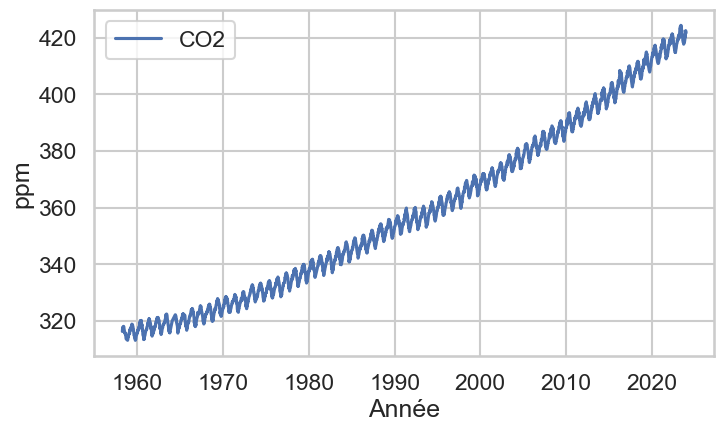

In [100]:
fig, ax = plt.subplots(1, 1, figsize = (8, 4.5))

ax.plot(records, label='CO2')
plt.ylabel('ppm')
plt.xlabel('Année')
# on change la fréquence des années
step = 10
ax.xaxis.set_major_locator(md.YearLocator(step, month = 1, day = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))

plt.legend()
plt.show()

La figure ci-dessous montre l'évolution de la concentration de CO2 en ppm depuis le début des enregistrements.    
On constate une évolution globale à la hausse avec des oscillations annuelles.    
Ces deux comportements sont mis en évidence dans la suite.

## Comportement moyen

Pour supprimer les oscillations annuelles, on calcule la moyenne sur un pas de temps d'au moins une année.

In [160]:
mean_records = records.resample('Y').mean()

Text(0.5, 0, 'Année')

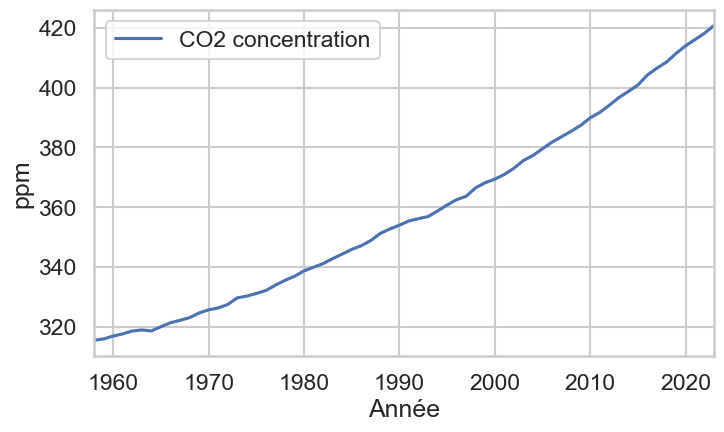

In [161]:
mean_records.plot(figsize = (8, 4.5))
plt.ylabel('ppm')
plt.xlabel('Année')

## Comportement annuel

Pour mettre en évidence le comportement annuel, on ramène les deux séries temporelles au même pas de temps, ici journalier, par interpolation.

In [187]:
# on repasse au pas de temps hebdomadaire
daily_mean_records = mean_records.resample('d').interpolate("linear")
daily_records = records .resample('d').interpolate("linear")
annuel_records = daily_records['CO2 concentration']['1960-01-01 00:00:00': '2023-12-30'] - daily_mean_records['CO2 concentration']['1960-01-01 00:00:00': '2023-12-30']

Text(0.5, 0, 'Année')

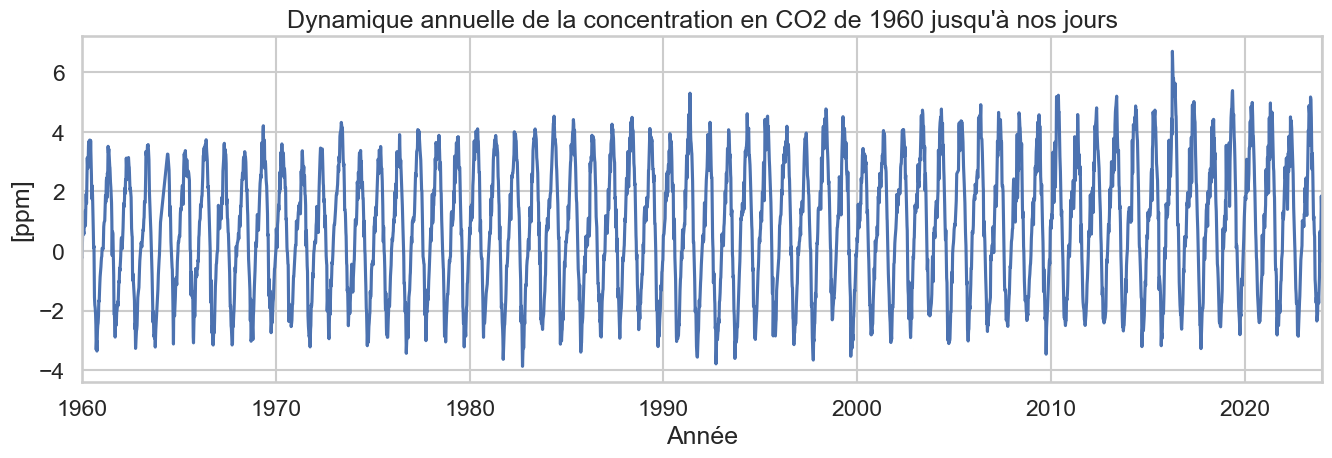

In [198]:
annuel_records.plot(figsize = (16, 4.5))
plt.title("Dynamique annuelle de la concentration en CO2 de 1960 jusqu'à nos jours")
plt.ylabel('[ppm]')
plt.xlabel('Année')

La figure ci-dessus montre l'oscillation annuelle de la concentration en CO2, avec une amplitude annuelle de 8ppm centrée autour de 0.   
Cela montre que le système Terre présente une variation naturelle annuelle de la conentration en CO2. Cependant on ne peut en connaître la cause ici.  

L'évolution totale du CO2 n'est pas d'origine naturelle et est attribué aux activités humaines.

On peut s'intéresser au type d'évolution du CO2 et estimer une prévision pour l'année 2025.

## Détermination d'un modèle d'évolution du CO2

On teste un premier modèle en évolution expontielle:

 CO2(t) = A * exp(B*t)
où:
- A et B sont des coefficients empiriques
- t est le temps

En appliquant le logarithme, on obtient une évolution linéaire en fonction du temps.

In [216]:
# Régression linéaire
log_records = np.log(mean_records)

coeff = np.polyfit(x=log_records.index.year,
           y=np.log(mean_records.values),
          deg=1)

x_esti = np.arange(1960, 2030, 1)
estimation = np.polyval(coeff, np.arange(1960, 2030, 1))

On évalue visuellement la performance du modèle

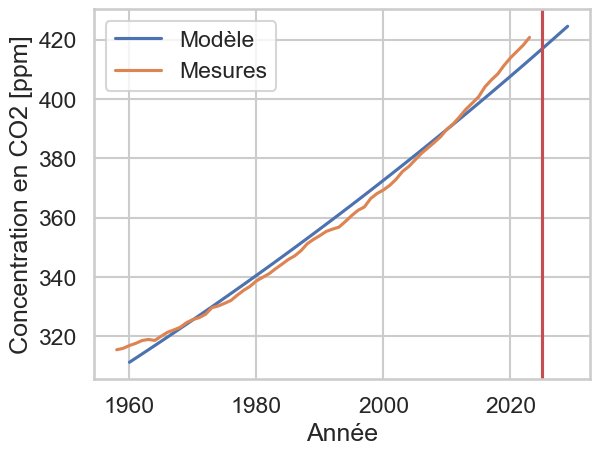

In [225]:
A = np.exp(coeff[1])
B = coeff[0]

CO2estime = A * np.exp(B * x_esti)

plt.figure()
plt.plot(x_esti, CO2estime, label='Modèle')
plt.plot(mean_records.index.year, mean_records.values, label='Mesures')
plt.axvline(2025, c='r')
plt.ylabel('Concentration en CO2 [ppm]')
plt.xlabel('Année')
plt.legend()

On constate que le modèle peut être une première approche pour approcher les émissions de CO2.   
Cependant les concentrations de CO2 se sont accélérés à partir de 2010 on voit les deux courbes qui s'éloignent l'une de l'autre.

Ce modèle prévoit pour 2025 une concentration de 417 ppm, qui a déjà été dépassé en 2023.

Des modèles plus élaborés et restant simple d'accès peuvent être envisagés, par exemple celui présenté par [l'ipsl sur le cycle du carbone](https://cycleducarbone.ipsl.jussieu.fr/index.php/enseignants/ressources/28-un-premier-modele-climatique-l-evolution-du-co2-atmospherique.html)